In [1]:
import numpy as np

In [2]:
A = [[1.,2.],[10.,20.]]
B = [[1.,2.],[100.,200.]]

In [3]:
A

[[1.0, 2.0], [10.0, 20.0]]

In [4]:
B

[[1.0, 2.0], [100.0, 200.0]]

In [5]:
np.dot(A, B)

array([[ 201.,  402.],
       [2010., 4020.]])

# Principle component identification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
rnd_num = np.random.RandomState(42)
X = np.dot(rnd_num.rand(2,2), rnd_num.randn(2, 500)).T

In [3]:
X

array([[-7.06275032e-01, -5.60911546e-01],
       [-5.50810755e-01, -4.63008578e-01],
       [ 2.82811768e-02,  8.01332565e-01],
       [-5.33973291e-01,  4.45221679e-02],
       [-1.29706786e-01, -3.14604522e-01],
       [-5.86785660e-01, -1.00304672e-01],
       [ 8.35586558e-02, -1.77307670e-01],
       [-2.22196567e-01, -3.70986829e-01],
       [-1.36546749e-01,  3.40666414e-02],
       [-1.57943397e+00, -1.94383023e+00],
       [-1.19439569e+00, -1.60791845e+00],
       [ 5.07562007e-01,  4.06303013e-02],
       [ 9.68832484e-02, -4.41507920e-01],
       [-8.11677523e-01, -3.55194597e-01],
       [-2.45654801e-01, -6.05201995e-01],
       [ 1.85390092e-01, -5.83973477e-01],
       [-1.03818322e+00,  7.34423846e-02],
       [ 4.32018026e-01,  1.60020305e-01],
       [-6.04673866e-01, -3.47255098e-01],
       [ 8.85096246e-03, -7.01313307e-01],
       [-9.29534570e-01, -8.55416426e-01],
       [-1.67438227e+00, -9.99313319e-01],
       [-1.97842115e+00, -1.81686241e+00],
       [ 1.

In [4]:
X [:, 0] = -X[:,0]

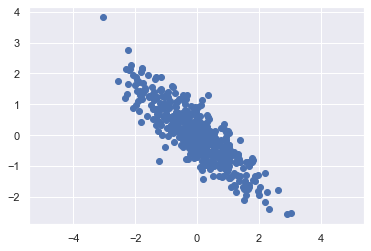

In [5]:
plt.scatter(X[:,0], X[:,1])
plt.axis('equal');

In [6]:
from sklearn.decomposition import PCA


In [7]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [13]:
print(pca.components_)
# Why 2 by 2 matrix

[[ 0.74020138 -0.67238524]
 [ 0.67238524  0.74020138]]


In [14]:
print(pca.explained_variance_)

[1.83472322 0.12289657]


In [15]:
print(pca.explained_variance_ratio_)

[0.93722143 0.06277857]


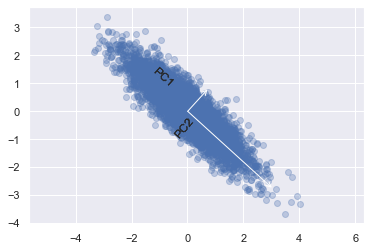

In [16]:
plt.scatter(X[:,0], X[:,1], alpha= 0.3)
for k, v in zip(pca.explained_variance_, pca.components_):
    vec = v * 3 * np.sqrt(k)
    
    ax = plt.gca()
    arrowprops=dict(arrowstyle='<-',
                    linewidth=1,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', pca.mean_, pca.mean_ + vec, arrowprops=arrowprops)
    ax.text(-0.90, 1.2,'PC1', ha='center', va='center', rotation=-42, size=12)
    ax.text(-0.1,-0.6,'PC2', ha='center', va='center', rotation=50, size=12)
plt.axis('equal');

# Dimentionality Reduction with PCA

In [17]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)

In [18]:
X.shape

(5000, 2)

In [19]:
X_pca.shape

(5000, 1)

(-3.725889312431627,
 4.3780452031679165,
 -4.044143206309595,
 3.7314809529607915)

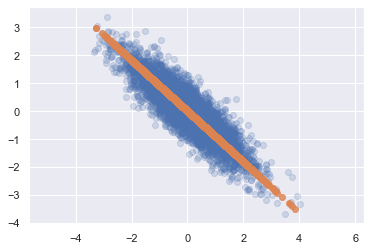

In [20]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0], X[:,1], alpha = 0.2)
plt.scatter(X_new[:,0], X_new[:,1], alpha=0.8)
plt.axis('equal')

# Dimentionality Reduction by Extracting Principal Components


In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

In [10]:
df = pd.read_csv('wine.data', names=['class','Alcohol', 'Malic acid ','Ash ','Alcalinity of ash','Magnesium', 'Total phenols', 'Flavanoids','Nonflavanoid phenol','Proanthocyanins',
'Color intensity','Hue','OD280/OD315 of diluted wines','Proline'])
df.shape

(178, 14)

In [11]:
df.head(80)

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenol,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2,11.66,1.88,1.92,16.0,97,1.61,1.57,0.34,1.15,3.80,1.23,2.14,428
76,2,13.03,0.90,1.71,16.0,86,1.95,2.03,0.24,1.46,4.60,1.19,2.48,392
77,2,11.84,2.89,2.23,18.0,112,1.72,1.32,0.43,0.95,2.65,0.96,2.52,500
78,2,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750


In [12]:
X = df.iloc[:,1:]

In [13]:
y = df['class']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                   random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [16]:
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

#X_train_sc = sc.fit_transform(X_train)
#X_test_sc = sc.fit_transform(X_test) <<---wrong appraoch

In [17]:
pca = PCA(n_components = 2)
pca.fit(X_test_sc)

PCA(n_components=2)

In [18]:
 pca.explained_variance_ratio_

array([0.40627457, 0.2388514 ])

In [19]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.406 0.239]


In [24]:
pd.DataFrame(np.round(pca.components_,3),columns=X.columns).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
Alcohol,0.128,-0.493,-0.185,0.079,-0.310,-0.186,-0.042,0.492,-0.418,0.292,-0.133,-0.217,0.037
Malic acid,-0.256,-0.190,0.142,0.424,0.211,-0.656,0.361,0.019,0.017,-0.250,0.130,0.107,0.034
Ash,-0.022,-0.317,0.610,-0.207,-0.199,-0.120,-0.180,-0.105,0.225,-0.173,-0.517,-0.086,-0.179
Alcalinity of ash,-0.244,0.035,0.595,-0.054,0.094,0.127,-0.255,0.394,-0.057,0.157,0.538,-0.039,0.135
Magnesium,0.148,-0.262,0.066,-0.650,0.514,-0.081,0.314,-0.121,-0.279,0.109,0.040,0.056,0.063
Total phenols,0.385,-0.096,0.177,0.246,-0.011,0.087,-0.083,-0.376,-0.411,-0.233,0.333,-0.307,-0.408
Flavanoids,0.420,-0.015,0.182,0.180,-0.032,0.012,-0.086,-0.175,-0.085,-0.123,-0.081,0.038,0.830
Nonflavanoid phenol,-0.299,-0.076,0.203,0.046,-0.459,0.322,0.615,-0.285,-0.143,0.231,0.048,0.029,0.100
Proanthocyanins,0.308,-0.074,0.151,0.331,0.377,0.416,0.394,0.371,0.277,0.037,-0.203,-0.164,-0.113
Color intensity,-0.119,-0.534,-0.124,0.117,0.058,0.392,-0.181,0.011,-0.067,-0.293,0.066,0.621,-0.040


In [21]:
pca = PCA(n_components = None)
pca.fit(X_train_sc)

PCA()

In [22]:
pca.fit_transform(X_train_sc)

array([[-1.16602698, -3.61532732,  1.15128454, ..., -0.1121504 ,
         0.07147567, -0.75559169],
       [-3.86261156, -0.48217746,  1.72758428, ...,  0.50457041,
        -0.18288356, -0.122403  ],
       [ 2.28353786,  1.27503318, -0.13167658, ...,  0.48017987,
        -0.45893296,  0.41585049],
       ...,
       [ 4.22339048, -2.40345929, -1.13704654, ..., -0.12930554,
        -0.20588086, -0.04785505],
       [-1.80527275,  1.49091985, -0.08991142, ..., -0.50730299,
        -0.48437788,  0.46676777],
       [-0.07808699,  1.19327925,  1.04439979, ..., -0.24025144,
         0.05180158, -0.28153725]])

In [23]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.359 0.187 0.116 0.074 0.067 0.049 0.042 0.027 0.023 0.019 0.017 0.013
 0.008]


In [41]:
np.cumsum(pca.explained_variance_ratio_)

array([0.35900066, 0.54592   , 0.66198557, 0.73570273, 0.80224132,
       0.85078714, 0.89273756, 0.91957678, 0.94305138, 0.96194872,
       0.97910815, 0.99173743, 1.        ])

Text(0, 0.5, 'Cumulative explained varince')

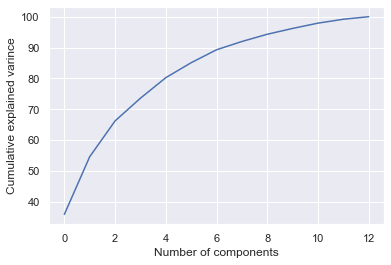

In [42]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100.)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained varince')

In [45]:
res = pca.transform(X_train_sc)
index_name = ['PCA_'+str(k) for k in range(0,len(res))]

In [46]:
index_name

['PCA_0',
 'PCA_1',
 'PCA_2',
 'PCA_3',
 'PCA_4',
 'PCA_5',
 'PCA_6',
 'PCA_7',
 'PCA_8',
 'PCA_9',
 'PCA_10',
 'PCA_11',
 'PCA_12',
 'PCA_13',
 'PCA_14',
 'PCA_15',
 'PCA_16',
 'PCA_17',
 'PCA_18',
 'PCA_19',
 'PCA_20',
 'PCA_21',
 'PCA_22',
 'PCA_23',
 'PCA_24',
 'PCA_25',
 'PCA_26',
 'PCA_27',
 'PCA_28',
 'PCA_29',
 'PCA_30',
 'PCA_31',
 'PCA_32',
 'PCA_33',
 'PCA_34',
 'PCA_35',
 'PCA_36',
 'PCA_37',
 'PCA_38',
 'PCA_39',
 'PCA_40',
 'PCA_41',
 'PCA_42',
 'PCA_43',
 'PCA_44',
 'PCA_45',
 'PCA_46',
 'PCA_47',
 'PCA_48',
 'PCA_49',
 'PCA_50',
 'PCA_51',
 'PCA_52',
 'PCA_53',
 'PCA_54',
 'PCA_55',
 'PCA_56',
 'PCA_57',
 'PCA_58',
 'PCA_59',
 'PCA_60',
 'PCA_61',
 'PCA_62',
 'PCA_63',
 'PCA_64',
 'PCA_65',
 'PCA_66',
 'PCA_67',
 'PCA_68',
 'PCA_69',
 'PCA_70',
 'PCA_71',
 'PCA_72',
 'PCA_73',
 'PCA_74',
 'PCA_75',
 'PCA_76',
 'PCA_77',
 'PCA_78',
 'PCA_79',
 'PCA_80',
 'PCA_81',
 'PCA_82',
 'PCA_83',
 'PCA_84',
 'PCA_85',
 'PCA_86',
 'PCA_87',
 'PCA_88',
 'PCA_89',
 'PCA_90',
 'PCA_91'

In [52]:
df1 = pd.DataFrame(res,columns = df.columns[1:],
                  index=index_name)[0:4]
df1.T.sort_values(by='PCA_0')


,PCA_0,PCA_1,PCA_2,PCA_3
Malic acid,-3.615327,-0.482177,1.275033,-2.496962
Alcohol,-1.166027,-3.862612,2.283538,-1.678507
Proline,-0.755592,-0.122403,0.415850,-0.791136
Proanthocyanins,-0.639966,-0.005981,-0.481336,-0.121445
Flavanoids,-0.553745,1.257686,-0.979052,-0.666927
Hue,-0.112150,0.504570,0.480180,-0.319599
OD280/OD315 of diluted wines,0.071476,-0.182884,-0.458933,0.045823
Magnesium,0.221634,-0.226540,0.215798,-0.003420
Color intensity,0.262397,-0.453600,-0.777822,-0.123055
Nonflavanoid phenol,0.918085,-0.113136,-0.678263,0.150849


In [48]:
df1.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenol,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
PCA_0,-1.166027,-3.615327,1.151285,1.167179,0.221634,3.062380,-0.553745,0.918085,-0.639966,0.262397,-0.112150,0.071476,-0.755592
PCA_1,-3.862612,-0.482177,1.727584,0.467086,-0.226540,-1.016510,1.257686,-0.113136,-0.005981,-0.453600,0.504570,-0.182884,-0.122403
PCA_2,2.283538,1.275033,-0.131677,1.107830,0.215798,1.004315,-0.979052,-0.678263,-0.481336,-0.777822,0.480180,-0.458933,0.415850
PCA_3,-1.678507,-2.496962,0.556619,1.131270,-0.003420,2.754779,-0.666927,0.150849,-0.121445,-0.123055,-0.319599,0.045823,-0.791136
PCA_4,1.572842,0.688203,-1.417945,-0.425082,-0.674013,-0.320546,-0.078362,-0.127387,0.251356,-0.275627,0.309145,-0.119233,0.353050


# Kernel PCA

In [54]:
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA, KernelPCA

In [55]:
import numpy as np
import pandas as pd

In [56]:
np.random.seed(0)

In [57]:
X, y = make_circles?

In [77]:
X, y = make_circles(n_samples=400, factor=0.3, noise=0.05)

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

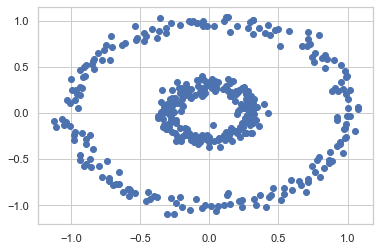

In [96]:
plt.figure()
plt.scatter(X[:,0],X[:,1])

In [97]:
kpca = KernelPCA(kernel = 'rbf', fit_inverse_transform = True, gamma = 10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

In [98]:
# hyper parameters



Text(0, 0.5, '$x_2$')

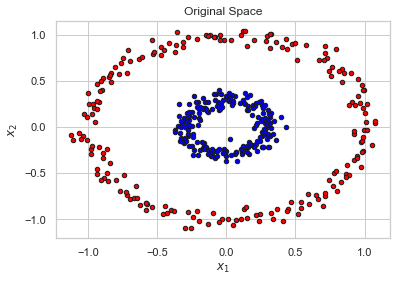

In [100]:
plt.figure()
plt.title('Original Space')
reds = y == 0
blues = y == 1
plt.scatter(X[reds, 0], X[reds, 1], c='red',
           s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c='blue',
           s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


Text(0, 0.5, '2nd Principal Components')

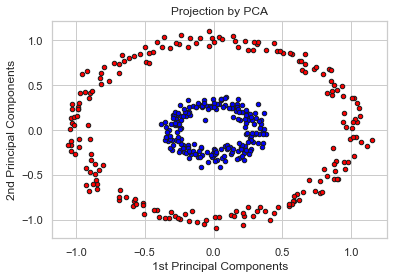

In [102]:
plt.figure()
plt.title('Projection by PCA')
reds = y == 0
blues = y == 1
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c='red',
           s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c='blue',
           s=20, edgecolor='k')
plt.xlabel("1st Principal Components")
plt.ylabel("2nd Principal Components")


Text(0, 0.5, '2nd Principal Component')

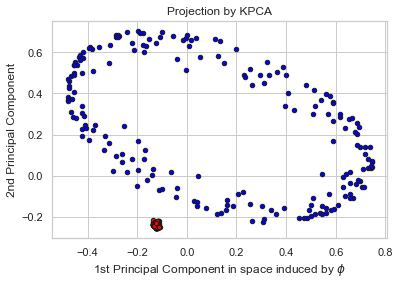

In [103]:
plt.figure()
plt.title('Projection by KPCA')
reds = y == 0
blues = y == 1
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c='red',
           s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c='blue',
           s=20, edgecolor='k')
plt.xlabel("1st Principal Component in space induced by $\phi$")
plt.ylabel("2nd Principal Component")


# Kernel PCA Example

In [123]:
df = sns.load_dataset('iris')
df = df[df['species'] != 'setosa']

In [124]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'versicolor': 0,
                  'virginica': 1}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [125]:
kpca = KernelPCA(kernel='rbf', n_components=2)
X_kpca = kpca.fit_transform(X)                 

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression()

In [134]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

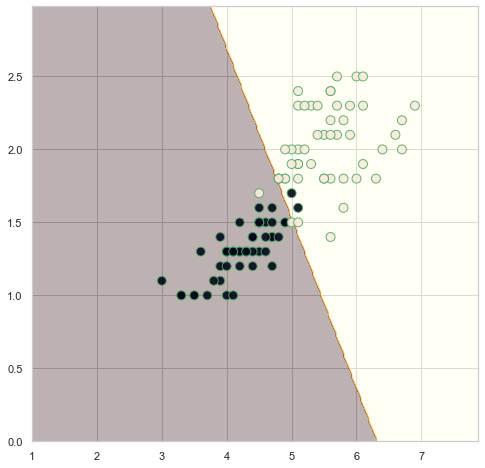

In [135]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,8))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

In [136]:
Xv = X_kpca
h = 0.02
x_min, x_max = Xv.min()- 0.5, Xv.max() + 0.5
y_min, y_max = y.min() - 0.5, y.max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

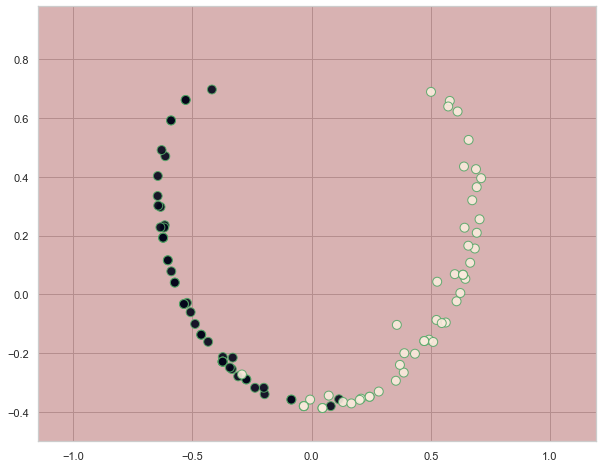

In [137]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(10,8))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X_kpca[:,0], X_kpca[:,1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

# Linear Discriminant Analysis (LDA)

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style()

In [139]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'versicolor': 0,
                  'virginica': 1}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [140]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [142]:
clf = LinearDiscriminantAnalysis()
clf.fit(X,y)

LinearDiscriminantAnalysis()

In [144]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

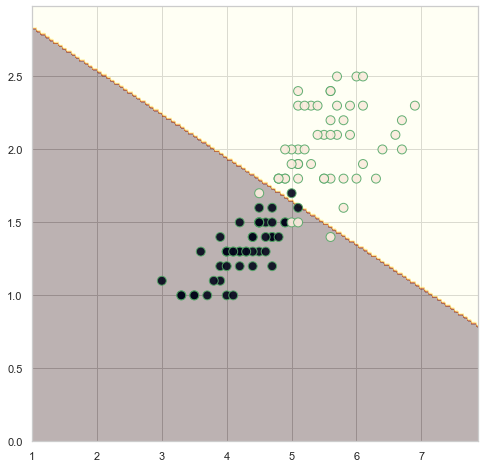

In [145]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,8))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

In [148]:
Xv = X_kpca
h = 0.02
x_min, x_max = Xv.min()- 0.5, Xv.max() + 0.5
y_min, y_max = y.min() - 0.5, y.max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

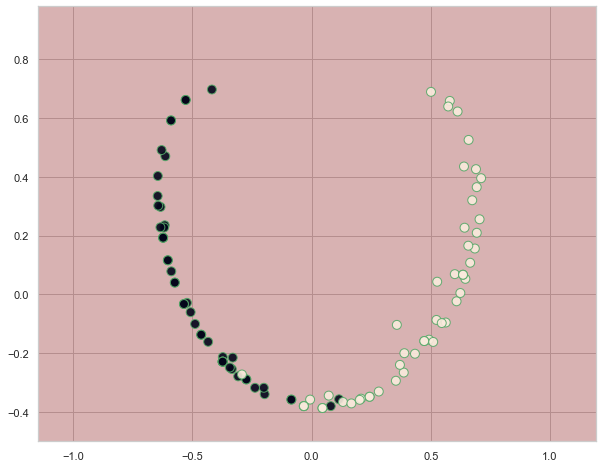

In [149]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(10,8))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X_kpca[:,0], X_kpca[:,1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

# Comparison Between LDA and PCA